# Imports

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport

# Dataset info

In [2]:
df = pd.read_csv('../data/raw/NLP training data 0816.csv')
df.head()

,question_id,client_id,campaign_id,question_category,question_subcategory,question_keyword,question_description
0,benefit_search-preventive_care-1,Aetna_Medicare,PDP_Conversion_SMS,Benefit Search,preventive care,Preventive care,Which plan(s) cover preventive benefits?
1,benefit_search-preventive_care-2,Aetna_Medicare,PDP_Conversion_SMS,Benefit Search,preventive care,Preventive care,How much does preventive benefits cost to me?
2,benefit_search-preventive_care-1,Aetna_Medicare,PDP_Conversion_SMS,Benefit Search,preventive care,Abdominal aortic aneurysm screening,Which plan(s) cover preventive benefits?
3,benefit_search-preventive_care-2,Aetna_Medicare,PDP_Conversion_SMS,Benefit Search,preventive care,Abdominal aortic aneurysm screening,How much does preventive benefits cost to me?
4,benefit_search-preventive_care-1,Aetna_Medicare,PDP_Conversion_SMS,Benefit Search,preventive care,Alcohol misuse screenings & counseling,Which plan(s) cover preventive benefits?


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11798 entries, 0 to 11797
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   question_id           11798 non-null  object
 1   client_id             11798 non-null  object
 2   campaign_id           11798 non-null  object
 3   question_category     11798 non-null  object
 4   question_subcategory  11723 non-null  object
 5   question_keyword      11797 non-null  object
 6   question_description  11798 non-null  object
dtypes: object(7)
memory usage: 645.3+ KB


# Pandas profiling

In [44]:
report = ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Duplicates

In [52]:
mask = df.drop_duplicates(subset=['question_description', 'question_keyword'], keep=False).index.values
df[~df.index.isin(mask)].sort_values(by=['question_description', 'question_keyword'])

,question_id,client_id,campaign_id,question_category,question_subcategory,question_keyword,question_description
6196,benefit_search-lab_services-2,Aetna_Medicare,PDP_Conversion_SMS,Benefit Search,lab services,"2019-ncov coronavirus, sars-cov-2/2019-ncov (c...",How much does lab services cost to me?
6202,benefit_search-lab_services-2,Aetna_Medicare,PDP_Conversion_SMS,Benefit Search,lab services,"2019-ncov coronavirus, sars-cov-2/2019-ncov (c...",How much does lab services cost to me?
3916,benefit_search-lab_services-2,Aetna_Medicare,PDP_Conversion_SMS,Benefit Search,lab services,Albumin (protein) level,How much does lab services cost to me?
3918,benefit_search-lab_services-2,Aetna_Medicare,PDP_Conversion_SMS,Benefit Search,lab services,Albumin (protein) level,How much does lab services cost to me?
5868,benefit_search-lab_services-2,Aetna_Medicare,PDP_Conversion_SMS,Benefit Search,lab services,Amplifed DNA or RNA probe detection of severe ...,How much does lab services cost to me?
...,...,...,...,...,...,...,...
1210,benefit_search-outpatient_X-rays-1,Aetna_Medicare,PDP_Conversion_SMS,Benefit Search,outpatient X-rays,X-ray exam of teeth,Which plan(s) cover outpatient X-rays?
1318,benefit_search-outpatient_X-rays-1,Aetna_Medicare,PDP_Conversion_SMS,Benefit Search,outpatient X-rays,X-ray exam of wrist,Which plan(s) cover outpatient X-rays?
1320,benefit_search-outpatient_X-rays-1,Aetna_Medicare,PDP_Conversion_SMS,Benefit Search,outpatient X-rays,X-ray exam of wrist,Which plan(s) cover outpatient X-rays?
1412,benefit_search-outpatient_X-rays-1,Aetna_Medicare,PDP_Conversion_SMS,Benefit Search,outpatient X-rays,X-ray urethra/bladder,Which plan(s) cover outpatient X-rays?


# EDA

## id

In [5]:
df.question_id.describe()

count                         11798
unique                          296
top       benefit_search-pharmacy-1
freq                           5473
Name: question_id, dtype: object

In [38]:
df.question_id.value_counts().index.values[:10]

array(['benefit_search-pharmacy-1', 'benefit_search-lab_services-2',
       'benefit_search-lab_services-1',
       'benefit_search-outpatient_X-rays-2',
       'benefit_search-outpatient_X-rays-1',
       'benefit_search-diagnostic_radiology-2',
       'benefit_search-diagnostic_radiology-1',
       'benefit_search-outpatient_musculoskeletal_procedure-2',
       'benefit_search-outpatient_musculoskeletal_procedure-1',
       'benefit_search-outpatient_other_organ_systems_procedure-2'],
      dtype=object)

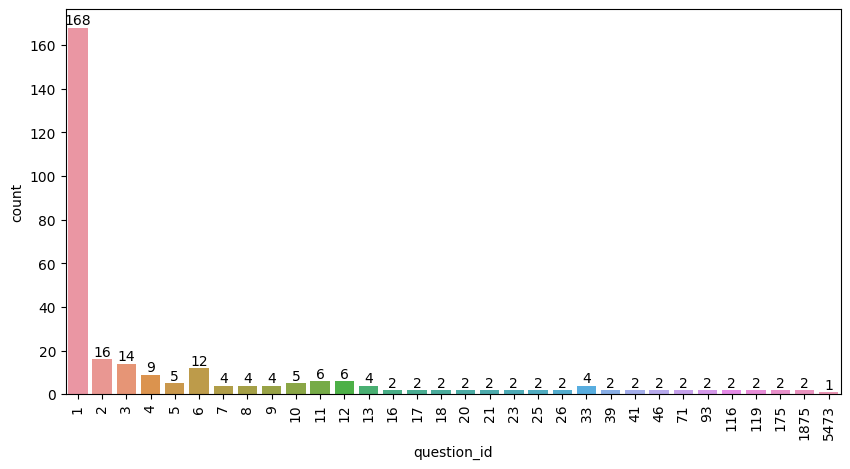

In [55]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.question_id.value_counts())
ax.bar_label(ax.containers[0]);

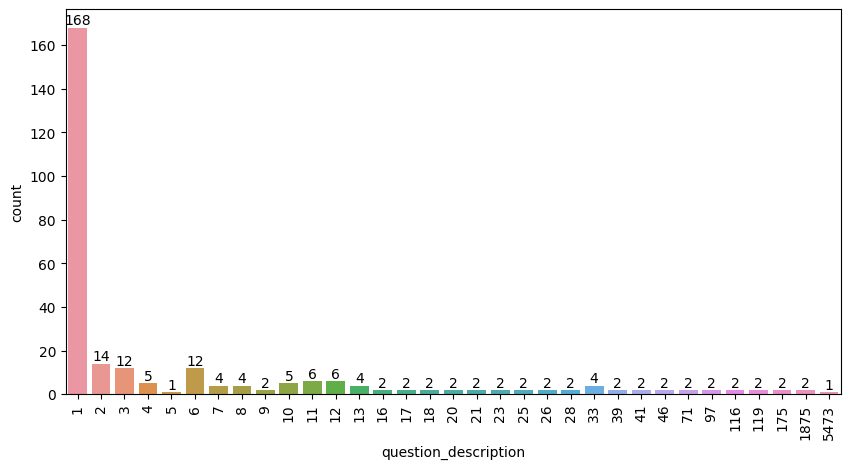

In [54]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.question_description.value_counts())
ax.bar_label(ax.containers[0]);

## questions

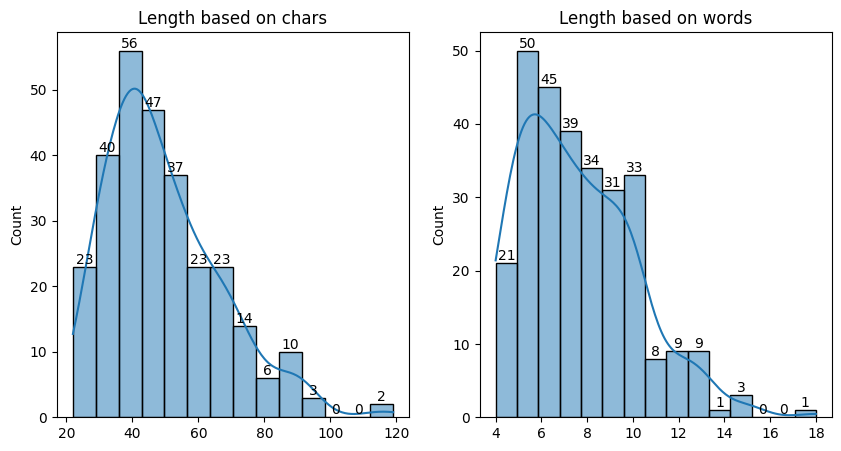

In [113]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
ax = sns.histplot(x=pd.Series(df.question_description.unique()).str.len(), kde=True)
ax.bar_label(ax.containers[0])
plt.title('Length based on chars')

plt.subplot(1,2,2)
ax = sns.histplot(x=pd.Series(df.question_description.unique()).str.split().apply(len), kde=True)
ax.bar_label(ax.containers[0])
plt.title('Length based on words');

## Keywords

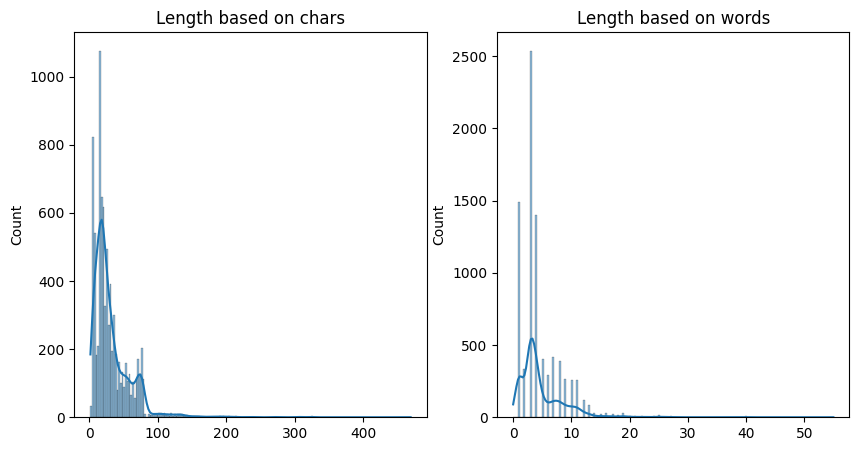

In [116]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
ax = sns.histplot(x=pd.Series(df.question_keyword.unique()).str.len(), kde=True)
plt.title('Length based on chars')

plt.subplot(1,2,2)
ax = sns.histplot(x=pd.Series(df.question_keyword.fillna('').unique()).str.split().apply(len), kde=True)
plt.title('Length based on words');

In [117]:
df['keyword_len'] = df.question_keyword.fillna('').str.split().apply(len)

In [138]:
df[df.keyword_len>10].sort_values(by='keyword_len', ascending=False).question_keyword.values[-2]

'HLA class II typing high resolution one allele or allele group'